# Visualizing and incrementally adding CrossCat models in iventure

__To produce visual rendering of models__
```
usage: %bql .render_crosscat [options] <metamodel_name> <model_number>

options:
    --subsample=<n>               number of rows to subsample (recommend <50)
    --width=<w>                   width of the figure
    --height=<c>                  height of the figure
    --rowlabels=<colname>         name of the column in the base table to use as row labels
    --progress=[True|False]       show a progress bar?
    --yticklabeslize=<fontsize>   size of the row labels
    --xticklabeslize=<fontsize>   size of the col labels
```

_Note_: To view a figure in full size, right-click and select 'Open in image in new tab'.

__To initialize more models to existing metamdoel__
```
usage: %mml INITIALIZE <n> MODELS IF NOT EXIST FOR <metamodel_name>

Ensures <metamodel_name> has at least <n> models in total.

If models [1..<k>] are already initialized for <metamodel_name>, then a new
set of models [<k+1>..<n>] will be initialized and appended to the metamodel.
```

In [1]:
%load_ext iventure.magics
%matplotlib inline

session_id: fsaad_2017-06-19T18:36:58.515635_D


### Load data table and create a population.

In [2]:
!rm -f resources/satellites.render.subsample.2.bdb
%bayesdb resources/satellites.render.subsample.2.bdb

u'Loaded: resources/satellites.render.subsample.2.bdb'

In [3]:
%bql CREATE TABLE satellites_t FROM 'resources/satellites.csv'
%bql .nullify satellites_t NaN

Nullified 3032 cells


In [4]:
%%mml
CREATE POPULATION satellites FOR satellites_t WITH SCHEMA(
    GUESS STATTYPES FOR (*);
)

""


### Create a metamodel with 1 model and 50 subsampled satellites.

In [5]:
%mml CREATE METAMODEL satellites_m FOR satellites WITH BASELINE crosscat;

""


In [6]:
%mml INITIALIZE 1 MODELS FOR satellites_m;

""


### Render the CrossCat state as sampled from the prior.

Creating figure...
[==============================] 100.00%
Rendering figure...


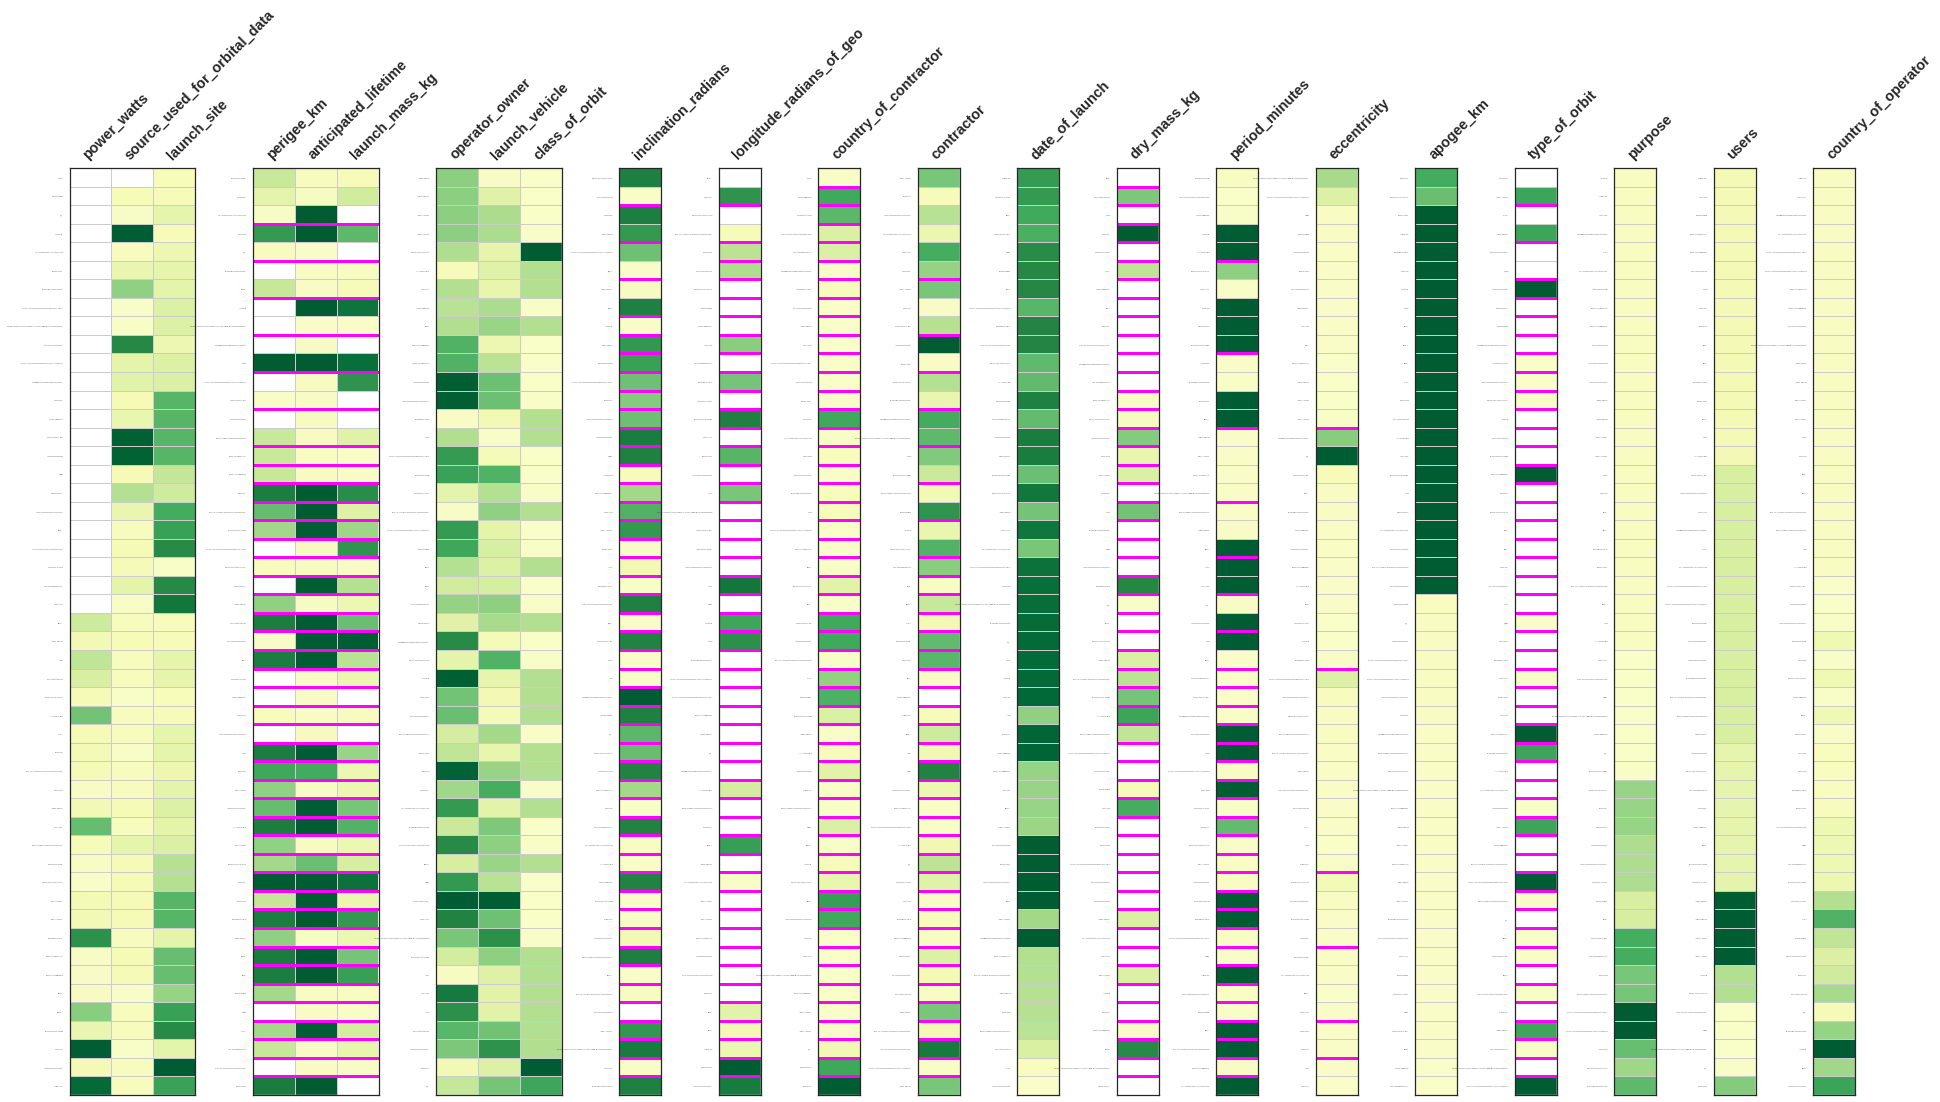

In [7]:
%mml .render_crosscat --progress=True --subsample=50 --rowlabels=Name satellites_m 0

### Show a dependence heatmap from the single model.

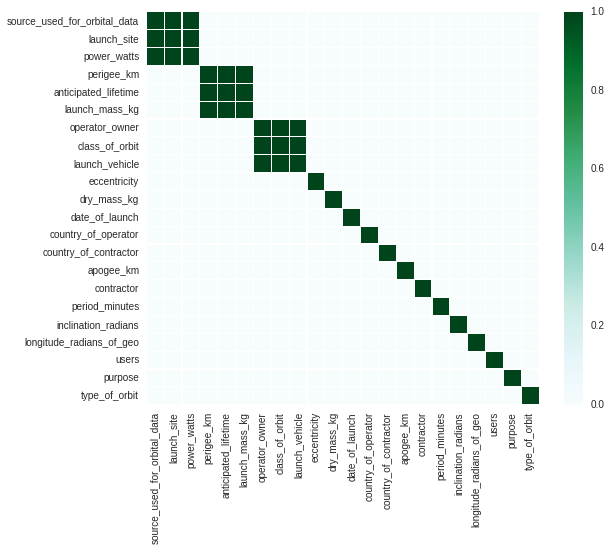

In [8]:
%bql .heatmap ESTIMATE DEPENDENCE PROBABILITY FROM PAIRWISE VARIABLES OF satellites

### Run 250 iterations of analysis (all kernels).

In [9]:
%mml ANALYZE satellites_m FOR 30 SECONDS WAIT (OPTIMIZED);

Completed: 57 iterations in 30.115064 seconds.


""


### Render the CrossCat model after analysis and show new dependencies.

Creating figure...
[==============================] 100.00%
Rendering figure...


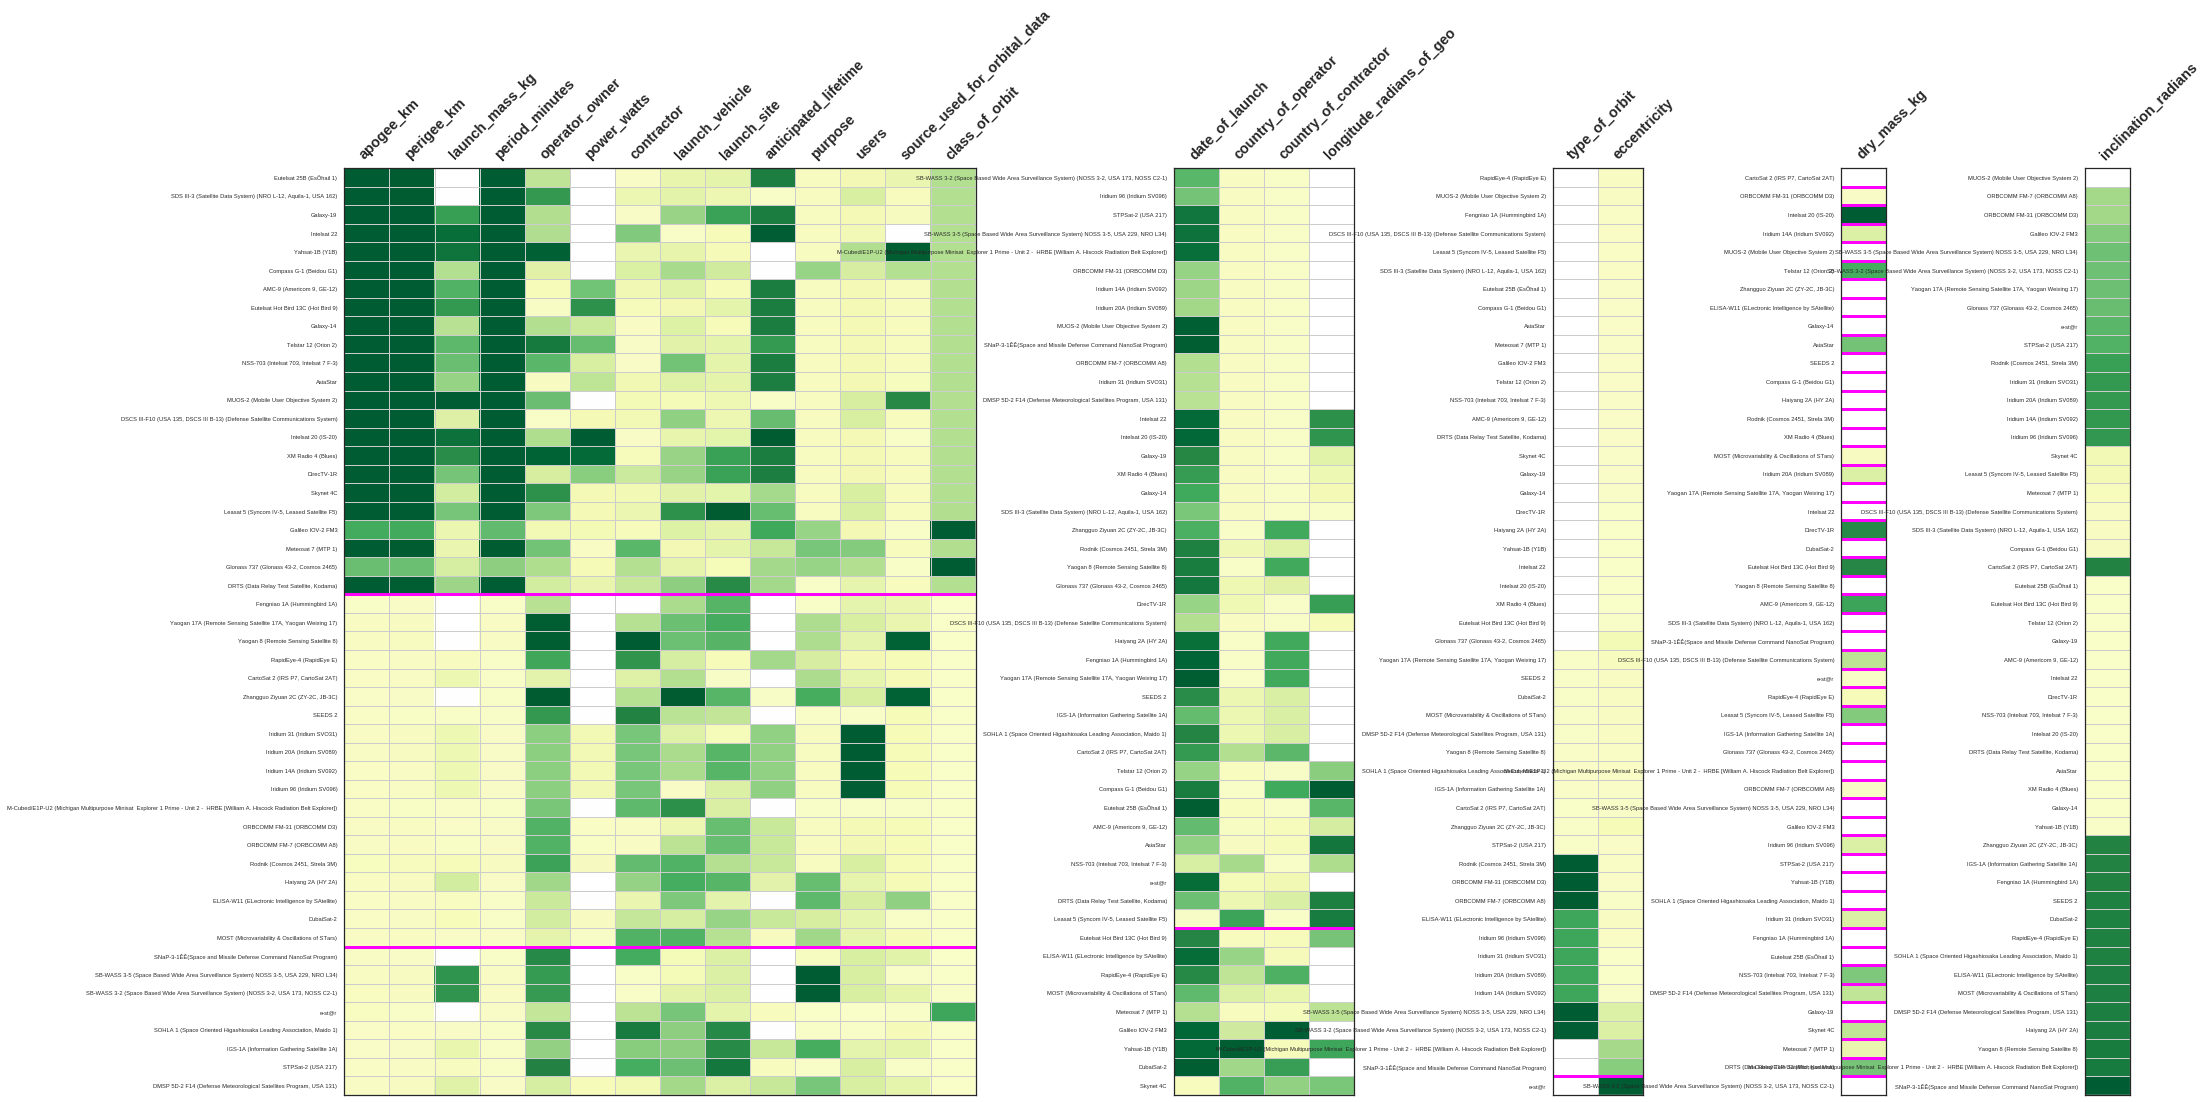

In [10]:
%mml .render_crosscat --subsample=50 --progress=True --yticklabelsize=xx-small --rowlabels=Name satellites_m 0

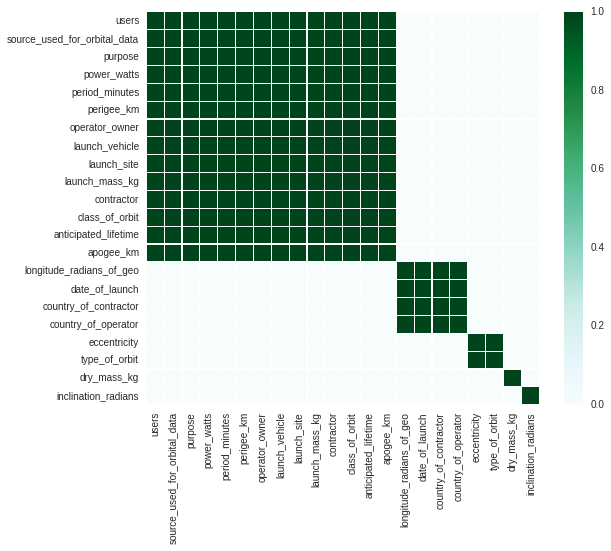

In [11]:
%bql .heatmap ESTIMATE DEPENDENCE PROBABILITY FROM PAIRWISE VARIABLES OF satellites;

### Dependencies and clusters in the view of a fixed variable are specified using --variable=&lt;name&gt;

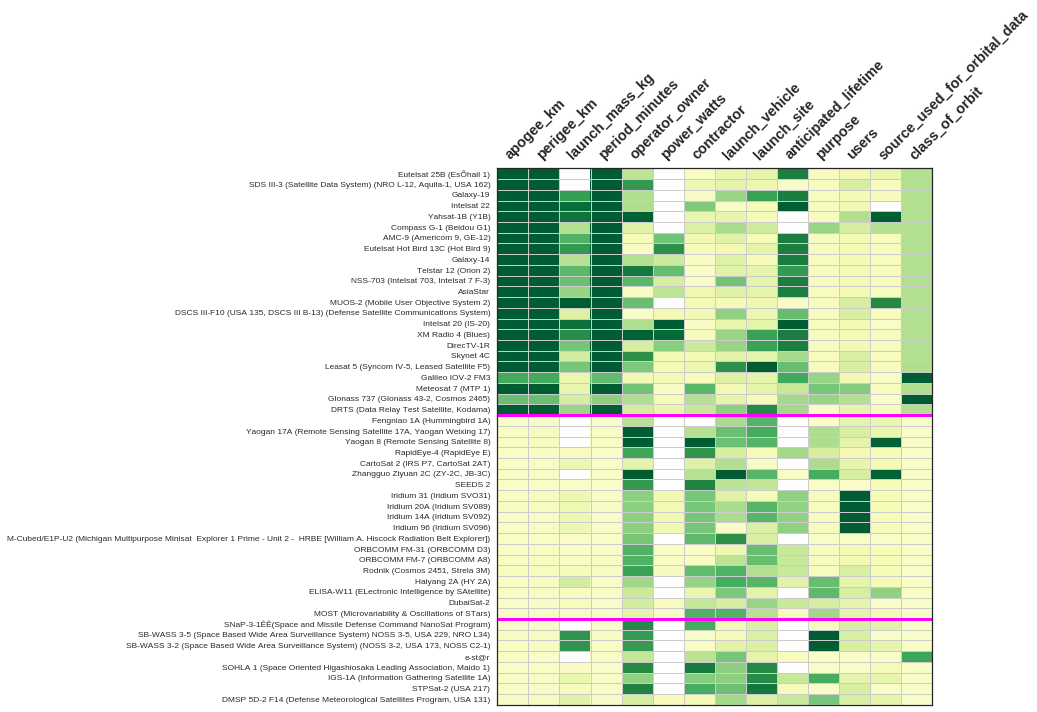

In [12]:
%mml .render_crosscat \
    --subsample=50 --yticklabelsize=small --height=10 --variable=class_of_orbit --rowlabels=Name satellites_m 0

### Initialize 15 more models for the metamodel, and render some models sampled from the prior.

In [13]:
%multiprocess on

Multiprocessing turned on from off.


In [14]:
%mml INITIALIZE 16 MODELS IF NOT EXISTS FOR satellites_m;

""


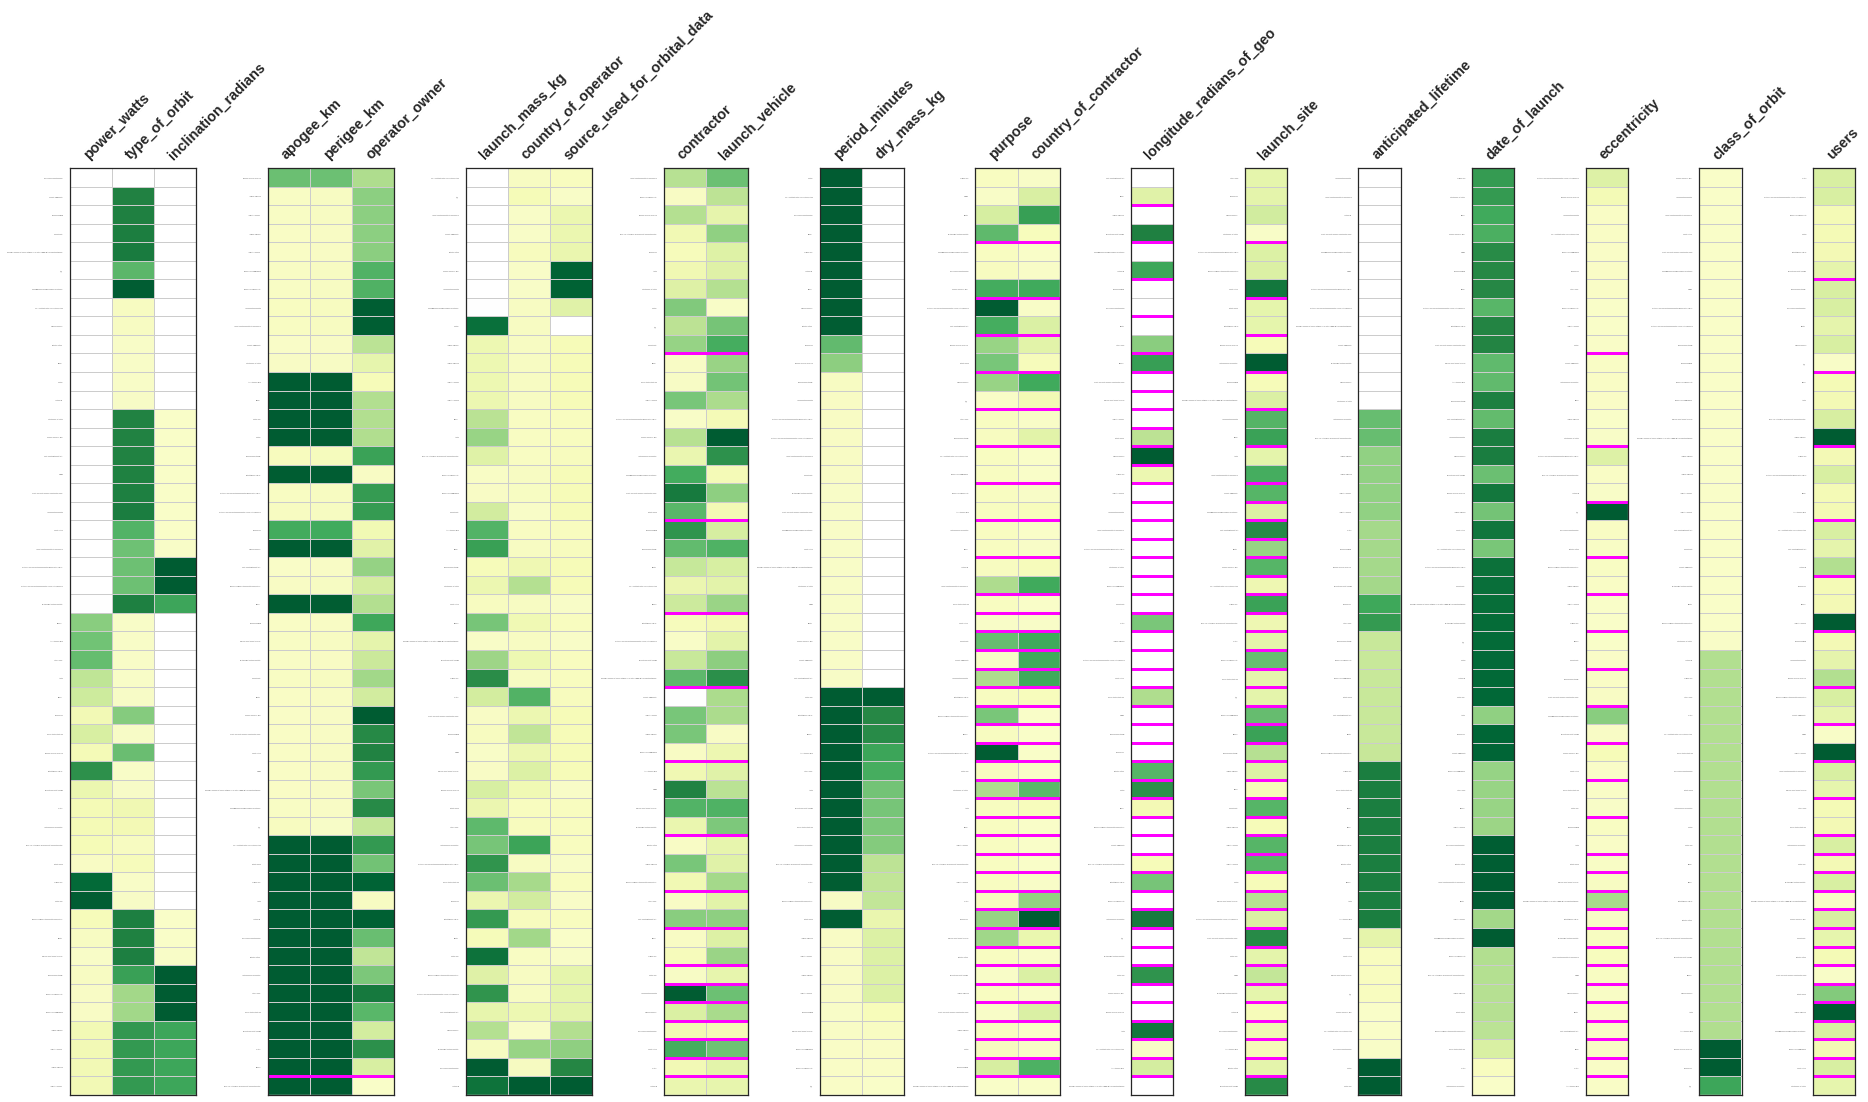

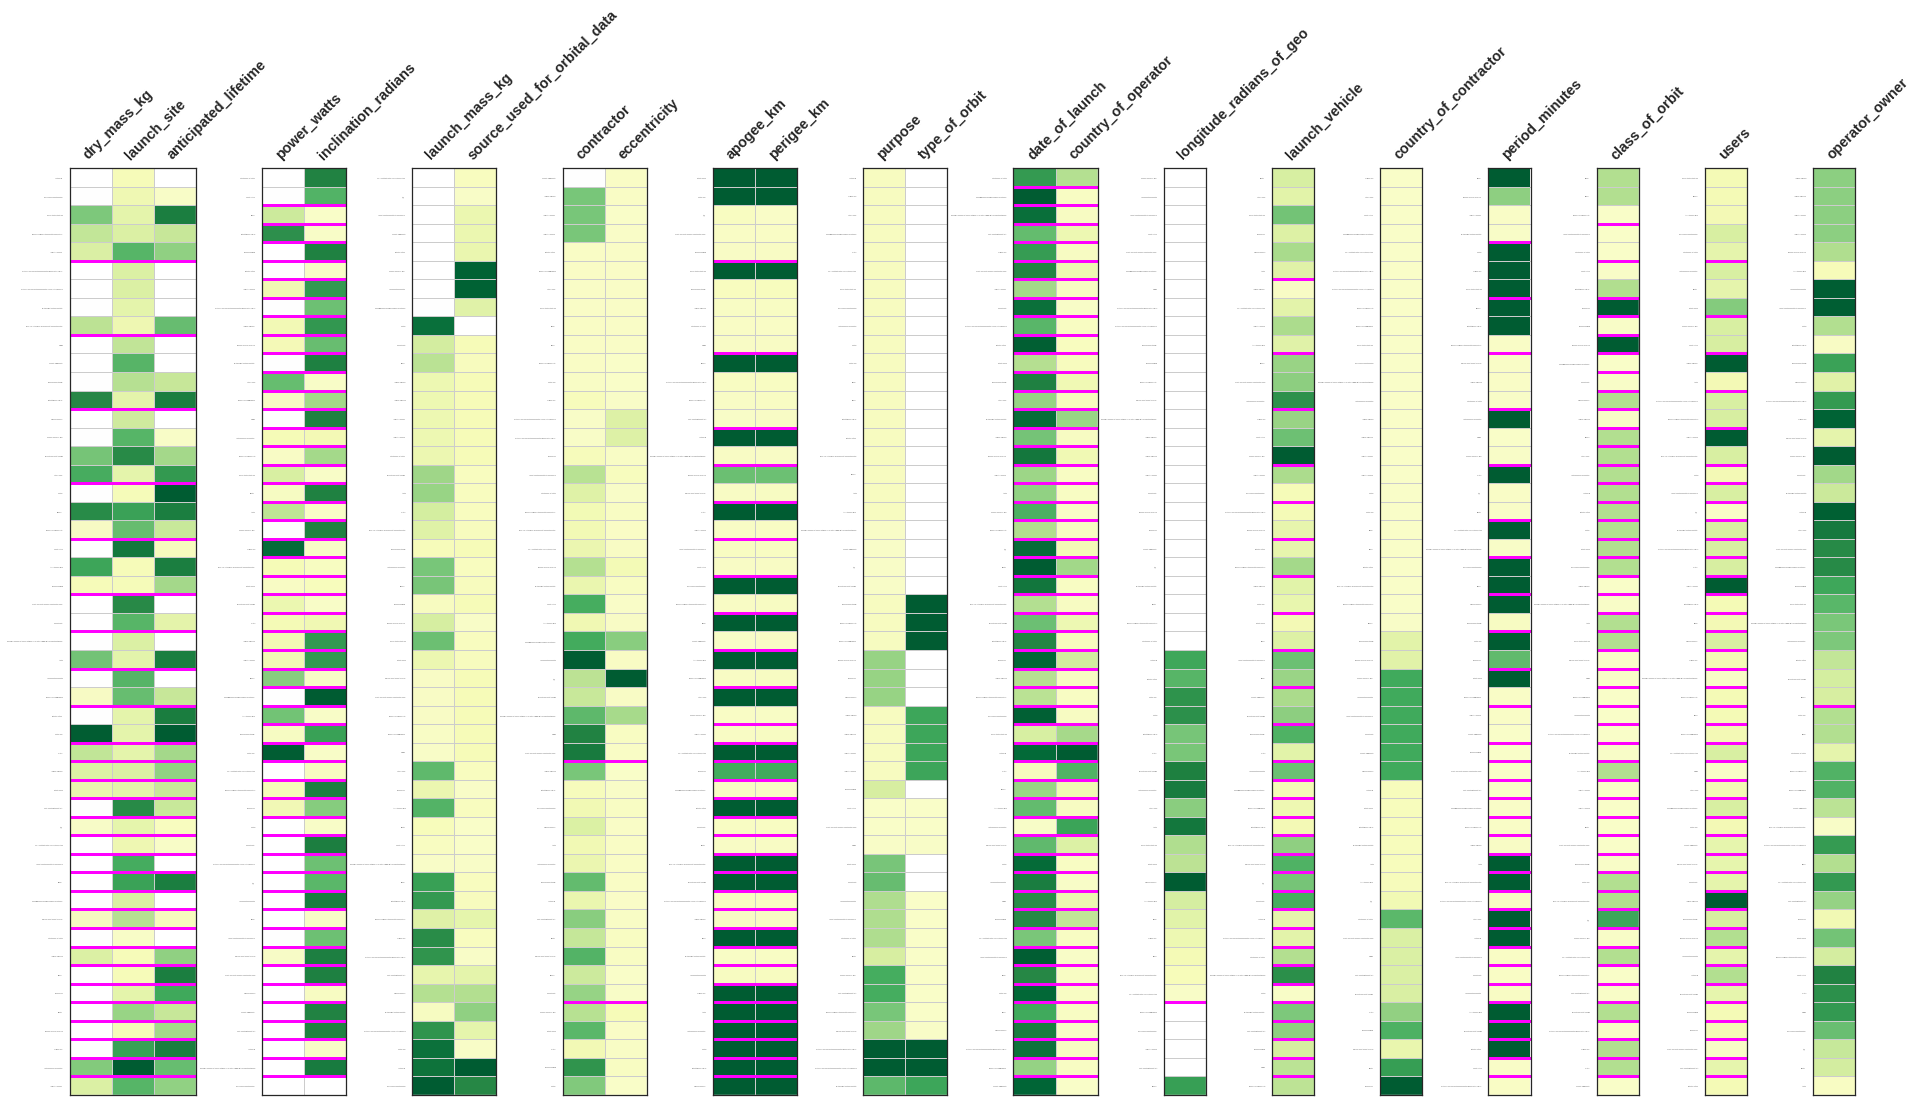

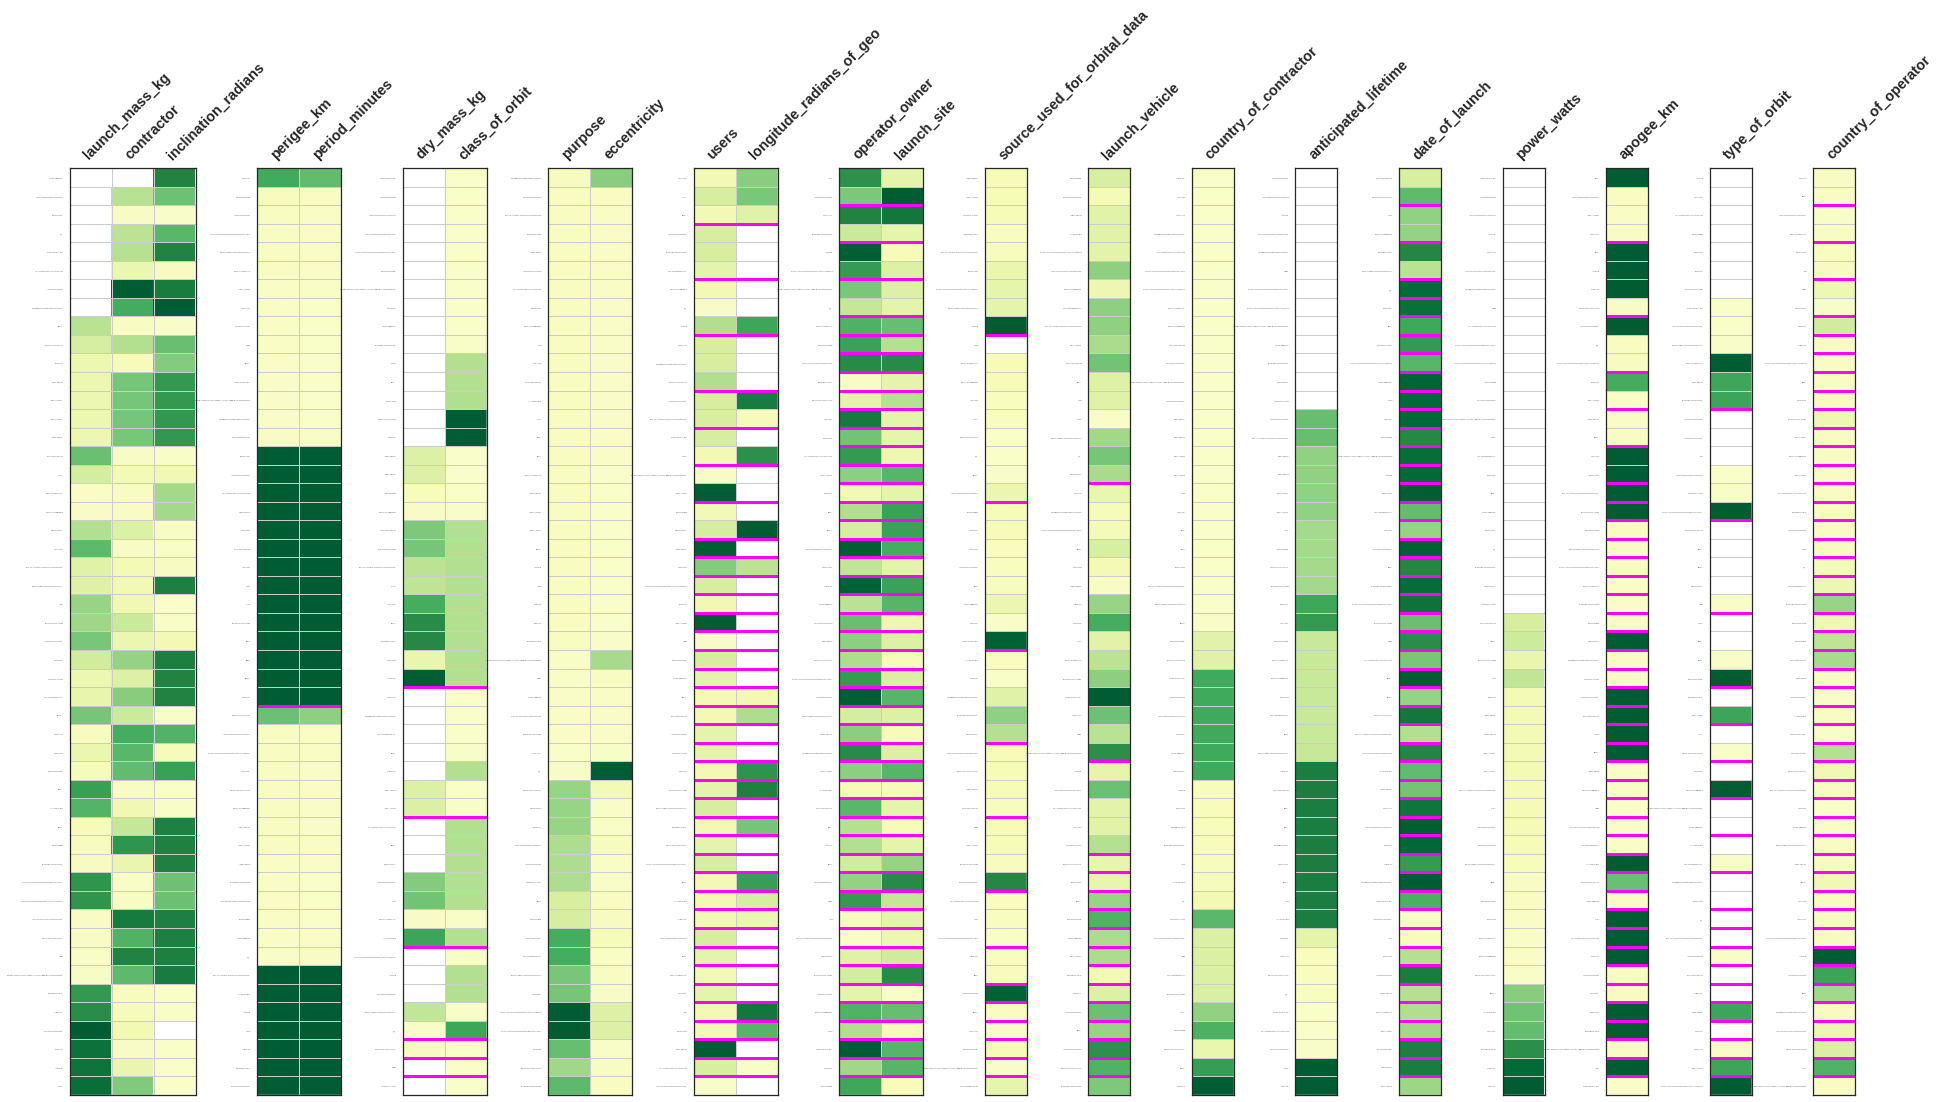

In [15]:
%mml .render_crosscat --subsample=50 --rowlabels=Name satellites_m 2
%mml .render_crosscat --subsample=50 --rowlabels=Name satellites_m 3
%mml .render_crosscat --subsample=50 --rowlabels=Name satellites_m 4

### Run 500 iterations of analysis.

In [16]:
%mml ANALYZE satellites_m FOR 250 ITERATION WAIT (OPTIMIZED);

Completed: 250 iterations in 66.661635 seconds.
Completed: 250 iterations in 66.967773 seconds.
Completed: 250 iterations in 73.007428 seconds.
Completed: 250 iterations in 73.351154 seconds.
Completed: 250 iterations in 73.922669 seconds.
Completed: 250 iterations in 75.377328 seconds.
Completed: 250 iterations in 76.860946 seconds.
Completed: 250 iterations in 77.794253 seconds.
Completed: 250 iterations in 78.088933 seconds.
Completed: 250 iterations in 79.616267 seconds.
Completed: 250 iterations in 79.370684 seconds.
Completed: 250 iterations in 79.259288 seconds.
Completed: 250 iterations in 80.219778 seconds.
Completed: 250 iterations in 83.613351 seconds.
Completed: 250 iterations in 88.056946 seconds.
Completed: 250 iterations in 99.851433 seconds.


""


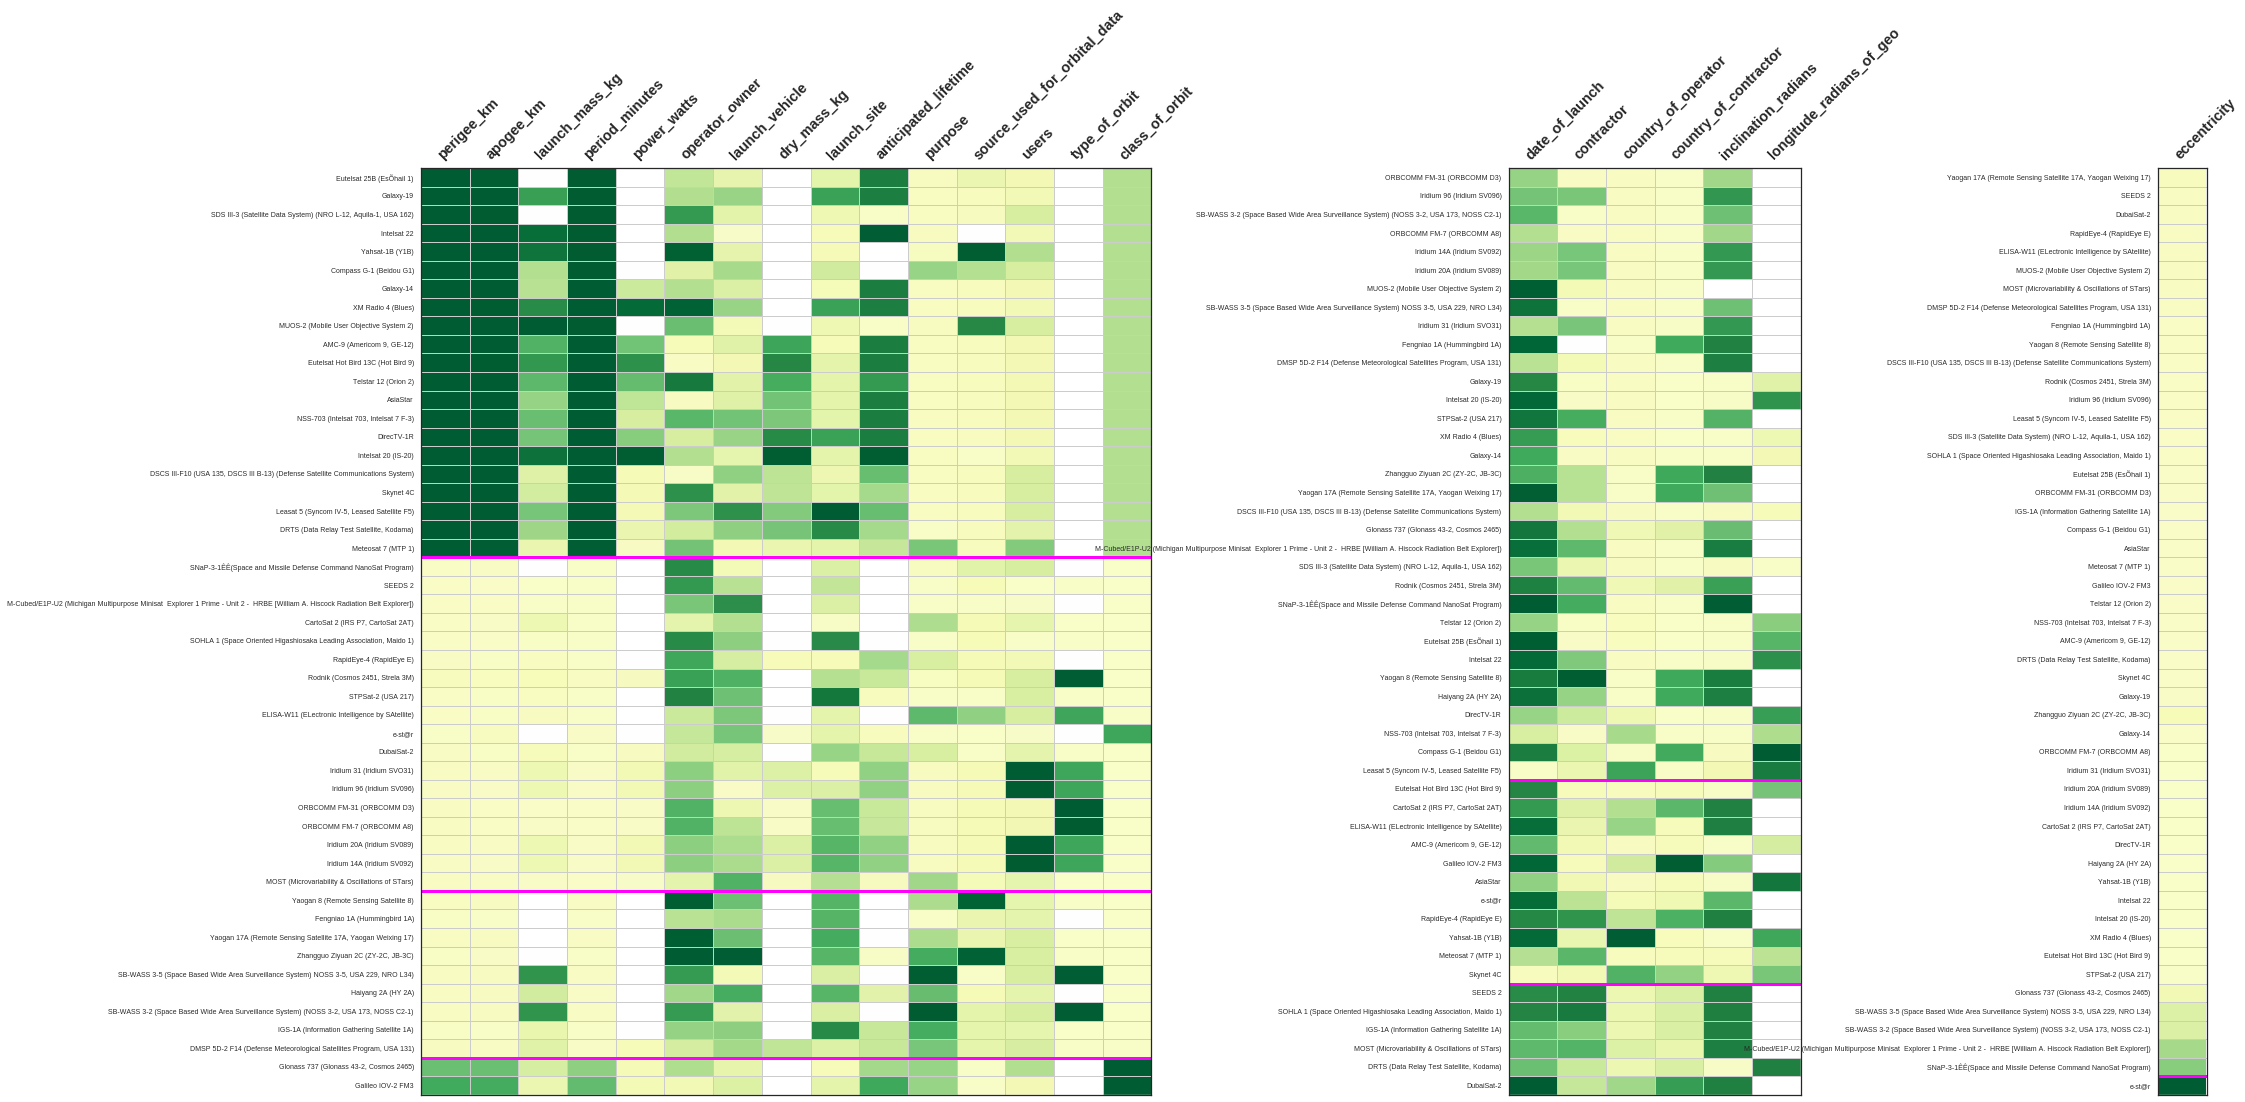

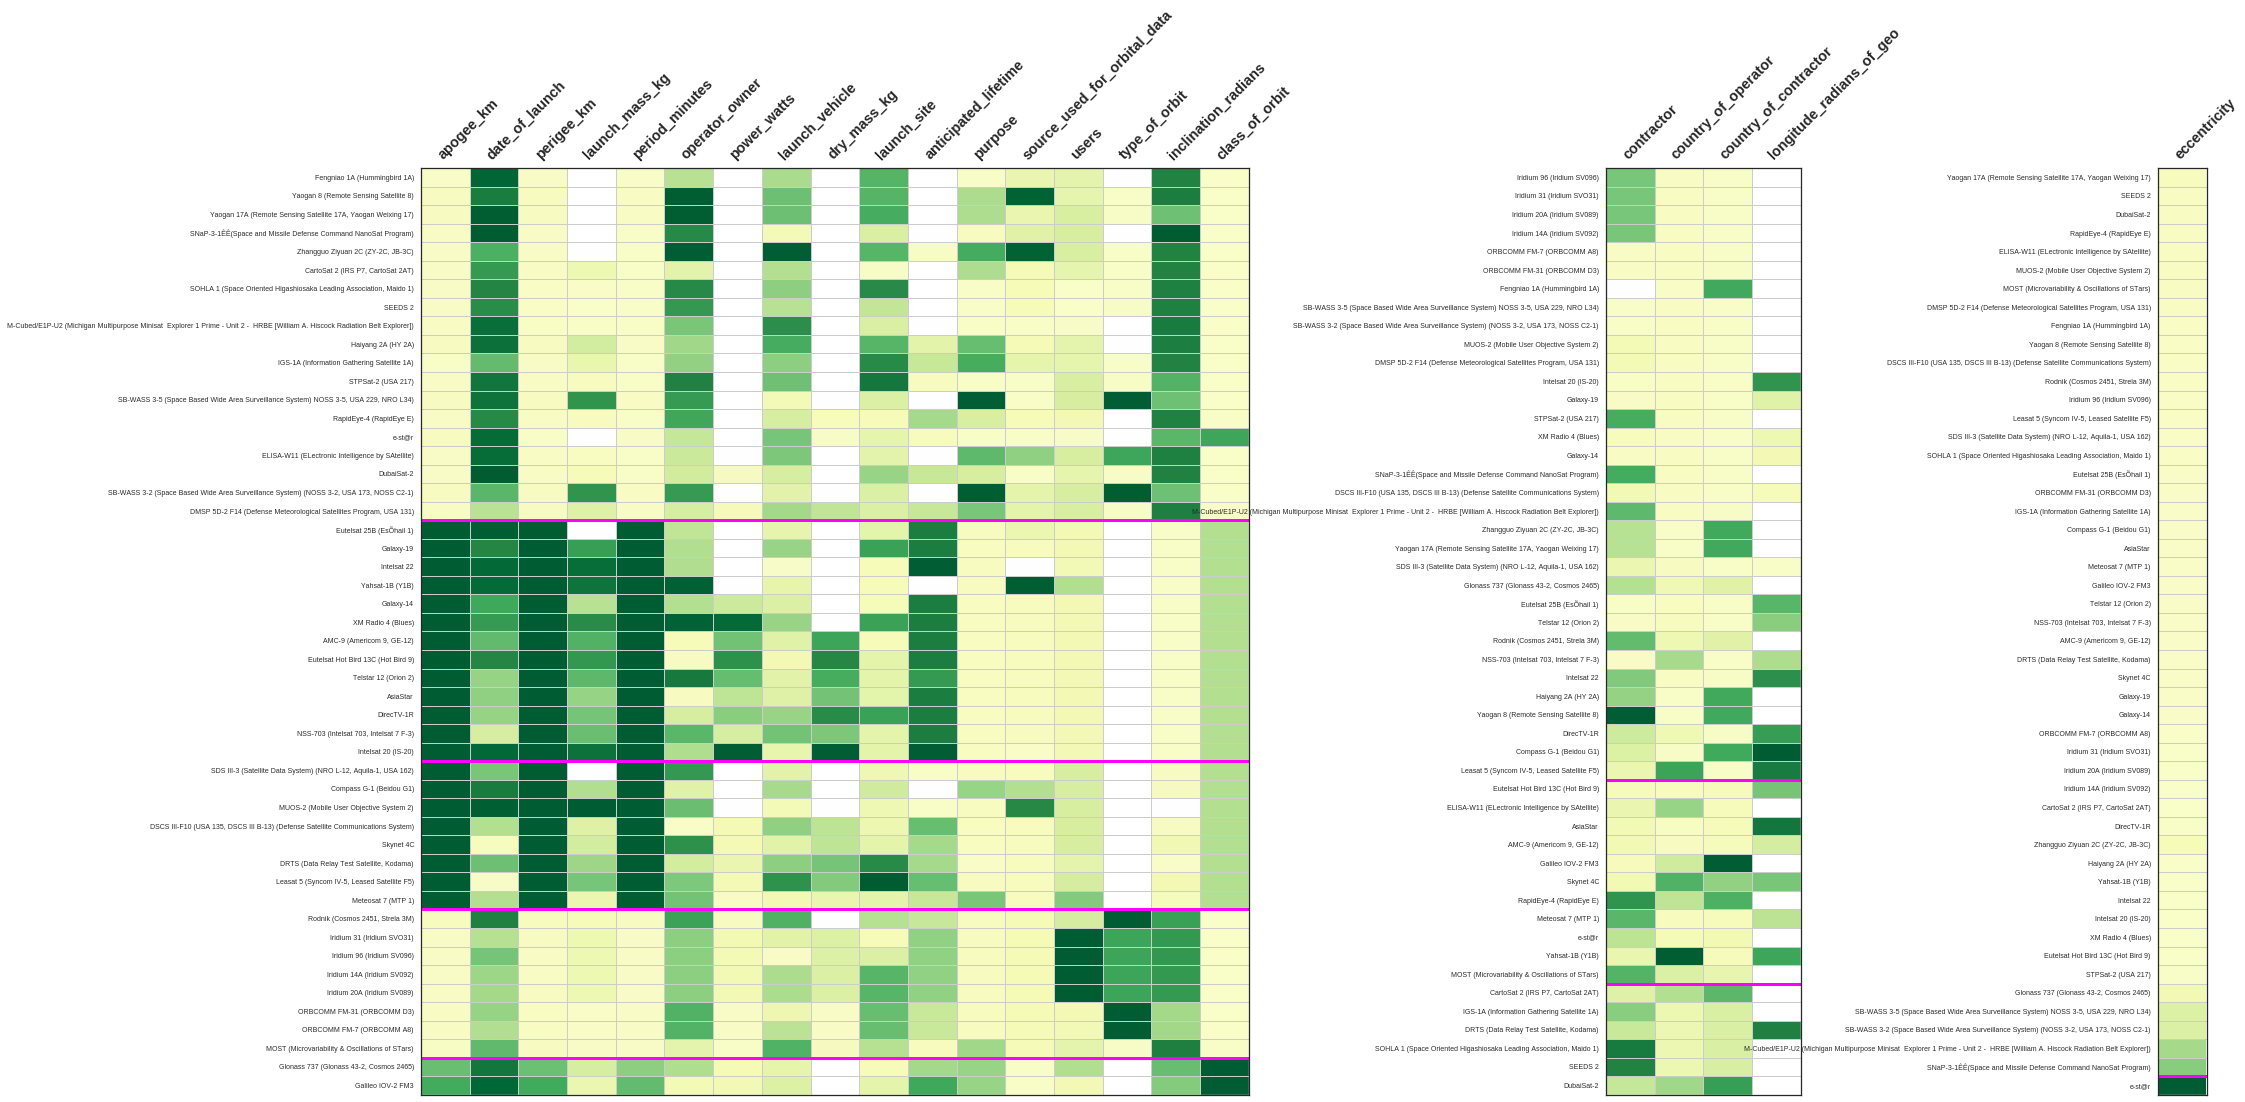

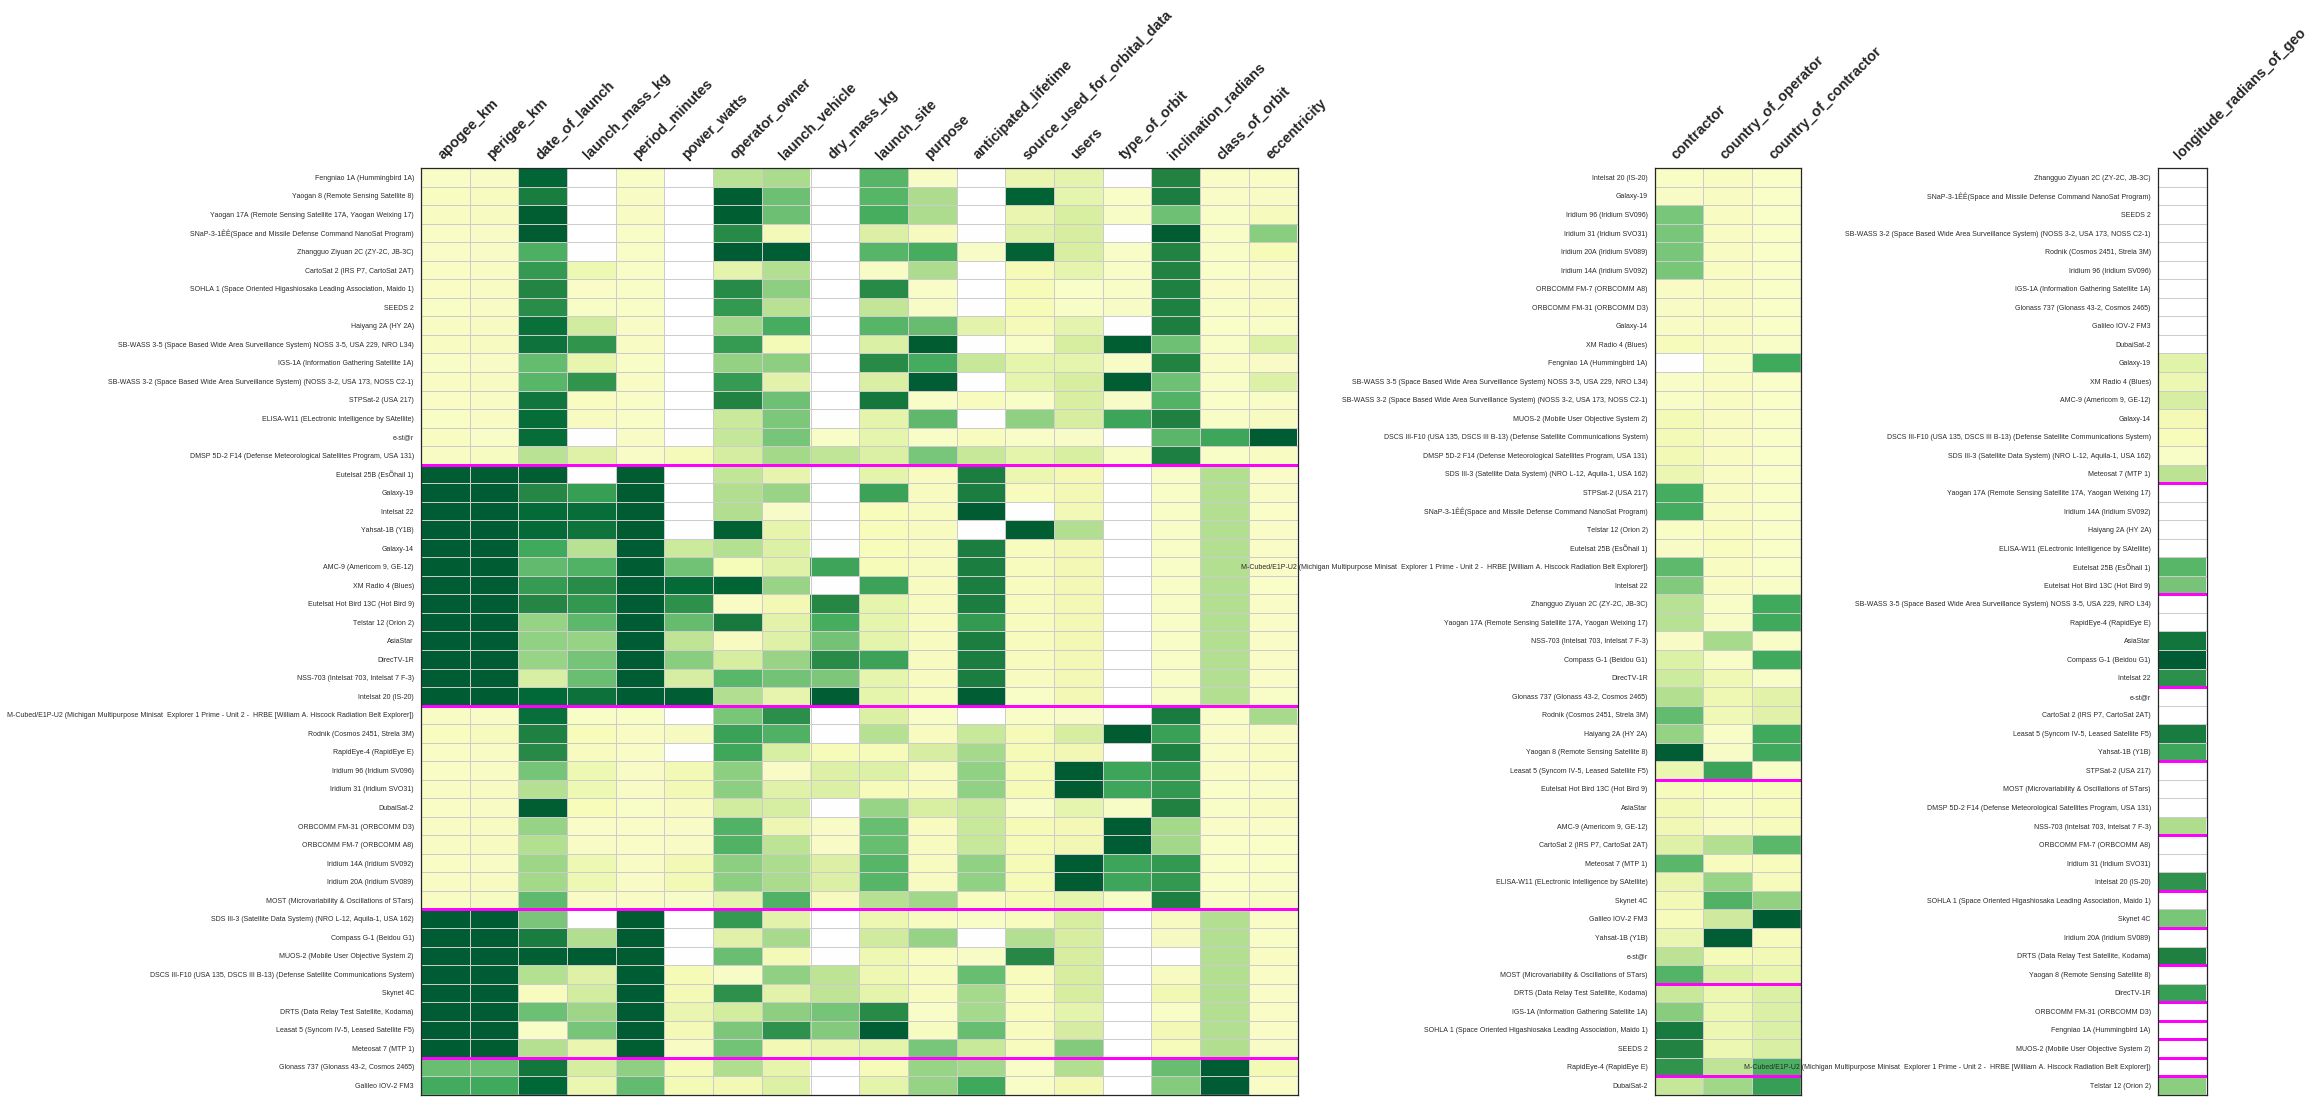

In [17]:
%mml .render_crosscat --subsample=50 --yticklabelsize=x-small --rowlabels=Name satellites_m 2
%mml .render_crosscat --subsample=50 --yticklabelsize=x-small --rowlabels=Name satellites_m 3
%mml .render_crosscat --subsample=50 --yticklabelsize=x-small --rowlabels=Name satellites_m 4

### Show dependence heatmap aggregating over the models.

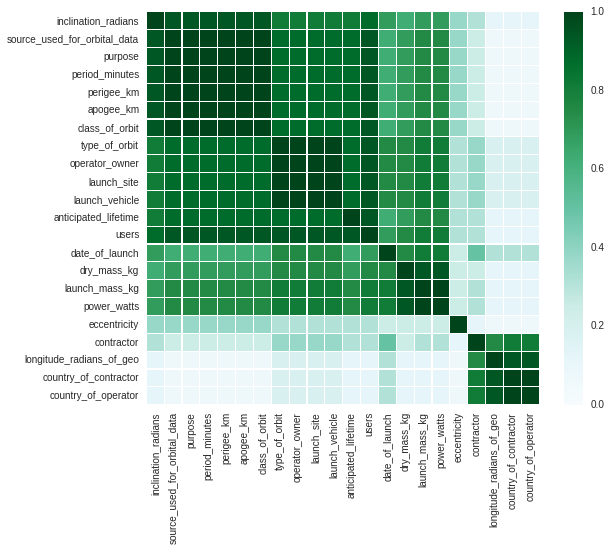

In [18]:
%bql .heatmap ESTIMATE DEPENDENCE PROBABILITY FROM PAIRWISE VARIABLES OF satellites;